In [126]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [125]:
data = pd.read_csv("/content/diabetes.csv")

In [124]:
data.shape

(768, 9)

In [123]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,148,72,35,0,33.6,0.627,50,1
1,NaN,85,66,29,0,26.6,0.351,31,0
2,NaN,183,64,0,0,23.3,0.672,32,1
3,NaN,89,66,23,94,28.1,0.167,21,0
4,NaN,137,40,35,168,43.1,2.288,33,1


In [122]:
data.isnull().values.any()

True

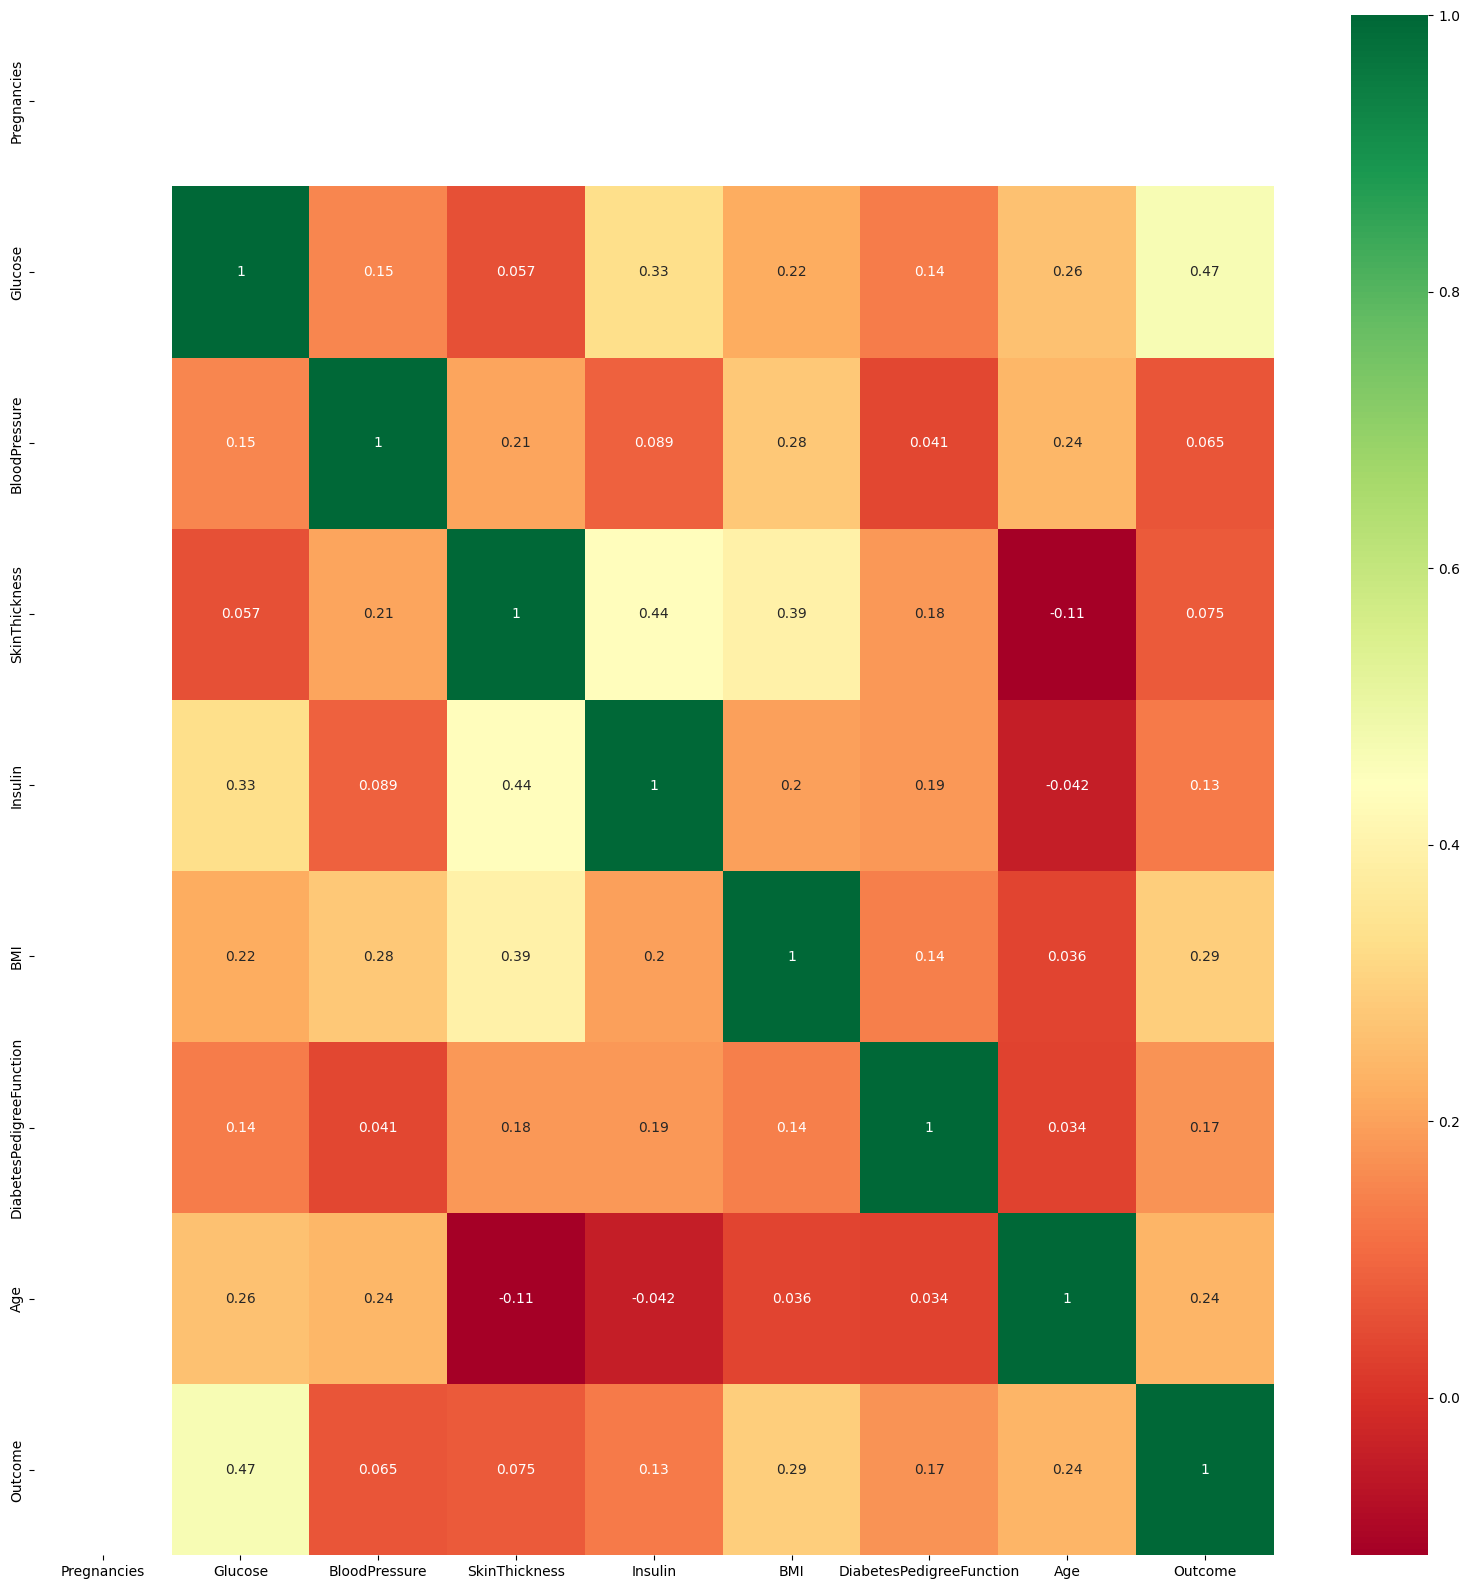

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
corrnat = data.corr()
top_corr_features = corrnat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [120]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Glucose,NaN,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,NaN,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,NaN,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,NaN,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,NaN,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,NaN,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,NaN,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,NaN,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [119]:
diabetes_map = {True: 1, False: 0}

In [118]:
data["Pregnancies"] = data["Glucose"].map(diabetes_map)

In [117]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.0,148,72,35,0,33.6,0.627,50,1
1,0.0,85,66,29,0,26.6,0.351,31,0
2,0.0,183,64,0,0,23.3,0.672,32,1
3,0.0,89,66,23,94,28.1,0.167,21,0
4,0.0,137,40,35,168,43.1,2.288,33,1


In [115]:
diabetes_true_count = len(data.loc[data['BloodPressure'] == True])
diabetes_false_count = len(data.loc[data['BloodPressure'] == False])

In [116]:
(diabetes_true_count,diabetes_false_count)

(0, 35)

In [113]:
data = data.fillna(0)

In [114]:
data.fillna(0, inplace=True)

In [112]:
data.dtypes

Pregnancies                 float64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [111]:
from sklearn.model_selection import train_test_split
feature_columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]
predicted_class = ['DiabetesPedigreeFunction']

In [68]:
X = data[feature_columns].values
y = data[predicted_class].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [109]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing Pregnancies: {0}".format(len(data.loc[data['Pregnancies'] == 0])))
print("number of rows missing Glucose: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows missing BloodPressure: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(data.loc[data['SkinThickness'] == 0])))
print("number of rows missing Insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows missing BMI: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows missing DiabetesPedigreeFunction: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing Age: {0}".format(len(data.loc[data['Age'] == 0])))
print("number of rows missing Outcome: {0}".format(len(data.loc[data['Outcome'] == 0])))

total number of rows : 768
number of rows missing Pregnancies: 768
number of rows missing Glucose: 5
number of rows missing BloodPressure: 35
number of rows missing SkinThickness: 227
number of rows missing Insulin: 374
number of rows missing BMI: 11
number of rows missing DiabetesPedigreeFunction: 0
number of rows missing Age: 0
number of rows missing Outcome: 500


In [110]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=0, strategy='constant')


X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

In [71]:
from scipy import stats
import numpy as np
f=open('/content/diabetes.csv','r').readlines()
w=f[1].split()
l1=w[1:8]
l2=w[8:15]
list1=[float(x) for x in l1]
list1
l3=w[1:8]
l4=w[8:15]
list2=[float(y) for x in l3]
list2

[]

In [72]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [73]:
classifier=xgboost.XGBClassifier(X,y)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `objective, use_label_encoder` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [74]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

}

In [75]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [76]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [77]:
from datetime import datetime
start_time = timer(None)

In [78]:
timer(start_time)


 Time taken: 0 hours 0 minutes and 1.33 seconds.


In [79]:
random_search

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
       [  0.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  0.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  0.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]]),
                                           predictor=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [80]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.0, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [81]:
from sklearn.model_selection import cross_val_predict

In [82]:
scaler = StandardScaler()

In [130]:
scaler.fit(X)

StandardScaler()

In [129]:
standardized_data = scaler.transform(X)

In [128]:
print(standardized_data)

[[ 0.          0.84832379  0.14964075 ...  0.46849198  1.4259954
   1.36589591]
 [ 0.         -1.12339636 -0.16054575 ... -0.36506078 -0.19067191
  -0.73212021]
 [ 0.          1.94372388 -0.26394125 ...  0.60439732 -0.10558415
   1.36589591]
 ...
 [ 0.          0.00330087  0.14964075 ... -0.68519336 -0.27575966
  -0.73212021]
 [ 0.          0.1597866  -0.47073225 ... -0.37110101  1.17073215
   1.36589591]
 [ 0.         -0.8730192   0.04624525 ... -0.47378505 -0.87137393
  -0.73212021]]


In [131]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [132]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [133]:
print(X)

[[ 0.          0.84832379  0.14964075 ...  0.46849198  1.4259954
   1.36589591]
 [ 0.         -1.12339636 -0.16054575 ... -0.36506078 -0.19067191
  -0.73212021]
 [ 0.          1.94372388 -0.26394125 ...  0.60439732 -0.10558415
   1.36589591]
 ...
 [ 0.          0.00330087  0.14964075 ... -0.68519336 -0.27575966
  -0.73212021]
 [ 0.          0.1597866  -0.47073225 ... -0.37110101  1.17073215
   1.36589591]
 [ 0.         -0.8730192   0.04624525 ... -0.47378505 -0.87137393
  -0.73212021]]


In [134]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [135]:
X = data.drop(columns = 'Outcome', axis=1)
Y = data['Outcome']

In [136]:
X = standardized_data
Y = data['Outcome']

In [137]:
X = standardized_data
Y = data['Outcome']

In [138]:
print(X)
print(Y)

[[ 0.         -3.7571036  -3.56486115 ... -0.01022106 -2.70705751
   2.13355143]
 [ 0.         -3.81881281 -3.58089709 ... -2.52764931 -2.8446161
  -2.26812021]
 [ 0.         -3.7228207  -3.58624241 ...  0.40022919 -2.83737617
   2.13355143]
 ...
 [ 0.         -3.78355041 -3.56486115 ... -3.49448769 -2.85185602
  -2.26812021]
 [ 0.         -3.77865285 -3.59693304 ... -2.54589154 -2.72877728
   2.13355143]
 [ 0.         -3.81097672 -3.57020646 ... -2.85600951 -2.9025355
  -2.26812021]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [139]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [140]:
print(X.shape, X_train.shape, X_test.shape)

(768, 9) (614, 9) (154, 9)


In [141]:
classifier = svm.SVC(kernel='linear')

In [142]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [143]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [144]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [145]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [146]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  1.0


In [149]:
input_data = (8,187,92,29,177,35.8,0.876,81,151)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[  8.    187.     92.     29.    177.     35.8     0.876  81.    151.   ]]
[1]
The person is diabetic
